In [2]:
import numpy as np
import  matplotlib.pyplot as plt

## Generation du jeu d'entrainement

In [ ]:
np.random.seed(42) 

# Features                                           -> array (100,1)
X = 2 * np.random.rand(100, 1)
# Target avec bruit                                  -> array (100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Normalisation
# X_mean = np.mean(X)
# X_std = np.std(X)
# X_scaled = (X - X_mean) / X_std
# X_b = np.c_[np.ones((100, 1)), X_scaled]  # Refaire X_b avec X normalisé

# ajout du biais : colonne de 1 pour le paramètre 0 (interception avec l'axe des ordonnée à x=0) -> array (100,2)
X_b = np.c_[np.ones((100, 1)), X] 


# Descente de gradient 
Vecteur de gradients $\boxed{
\nabla_\theta MSE =  \dfrac{2}{m} X^T (X\theta - y)}
$


learning_rate=0.01 → theta final: [3.87981508 3.06614835]
learning_rate=0.05 → theta final: [4.21481327 2.77036316]
learning_rate=0.2 → theta final: [4.21509616 2.77011339]
learning_rate=0.3 → theta final: [4.21509616 2.77011339]
learning_rate=0.4 → theta final: [4.21509616 2.77011339]


(0.0, 2.0, 3.0, 11.0)

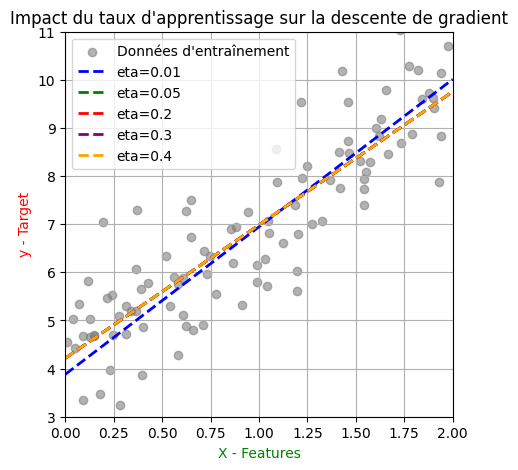

In [ ]:
# Liste des taux d'apprentissage à tester
# Liste de leurs couleurs associées
learning_rate_list = [0.01, 0.05, 0.2, 0.3, 0.4]
colors = ["blue", "green", "red", "purple", "orange"]

# Initialisation du graphique
# Affichage du jeu d'entraînement
plt.figure(figsize=(5, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Données d'entraînement")

# Jeu de test - 2 valeurs sufisent pour tracer une droite
X_test = np.array([[0], [2]])              #  x = 0 et x = 2     -> array(2, 1)
X_test_b = np.c_[np.ones((2, 1)), X_test]  # Ajout du biais      -> array(2, 2)

for learning_rate, color in zip(learning_rate_list, colors):

    n_iterations = 500 
    # n_iterations = 500 if learning_rate <= 0.1 else 100  # Moins d'itérations pour grands learnig_rate afin d'éviter une divergence rapide
    m = 100                                              # Nombre d'observations

    # Initialisation des paramètres du modèle (vecteur 𝜃) avec des valeurs aléatoires.
    # vecteur colonne                          -> array(2,1)
    theta = np.random.randn(2,1)

    # Descente de gradient
    for iteration in range(n_iterations):
        # Mise à jour des paramètres 𝜃 en utilisant la descente de gradient basée sur la formule du Vecteur Gradient du MSE
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - learning_rate * gradients
        # # debuggage
        # if iteration % 50 == 0:  # Afficher toutes les 50 itérations
        #     print(f"eta={learning_rate}, iter={iteration}, theta={theta.ravel()}")

    # Affichage des paramètres appris 𝜃 après convergence pour chaque taux d'apprentissage
    print(f"learning_rate={learning_rate} → theta final: {theta.ravel()}")
    
    # Prédictions pour 𝑋test en utilisant les paramètres 𝜃 appris
    y_pred = X_test_b @ theta

    # Tracé de la droite de régression correspondant au taux d'apprentissage testé
    # plt.plot(X_test, y_pred, color=color, linewidth=2, label=f"eta={learning_rate}")
    plt.plot(X_test, y_pred, color=color, linestyle="--", linewidth=2, label=f"eta={learning_rate}")

# Mise en forme du graphique
plt.xlabel("X - Features",  color="green")
plt.ylabel("y - Target",  color="red")
plt.title("Impact du taux d'apprentissage sur la descente de gradient")
plt.legend()
plt.grid(True)
plt.axis([0, 2, 3, 11])



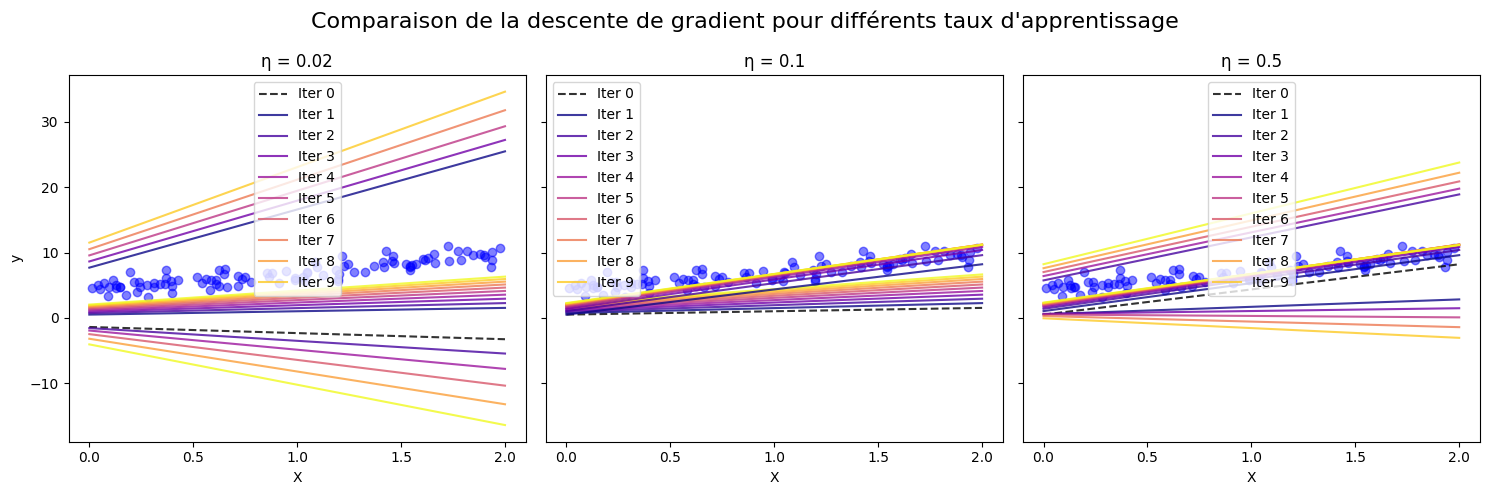

In [40]:

# Descente de gradient
def gradient_descent(X_b, y, eta, n_iterations=10):
    theta = np.random.randn(2, 1)  # Initialisation aléatoire
    history = [theta.copy()]  # Stocke les valeurs de theta
    
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        history.append(theta.copy())  # Sauvegarde de l'évolution

    return history

# Paramètres d'apprentissage
etas = [0.02, 0.1, 0.5]  # Différents taux d'apprentissage
n_iterations = 10  # Nombre de mises à jour

# Création des sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

X_range = np.array([[0], [2]])  # Intervalle pour afficher les lignes de régression

# Créer une palette de couleurs (du vert au rouge)
colors = plt.cm.plasma(np.linspace(0, 1, n_iterations))

for ax, eta in zip(axes, etas):

    # boucle pour afficher diffremment la première itération
    for i, theta in enumerate(history):
        y_pred = theta[0] + theta[1] * X_range

        if i == 0:
            ax.plot(X_range, y_pred, linestyle="--", color="black", alpha=0.8, label="Initial (Iter 0)")
        else:
            ax.plot(X_range, y_pred, linestyle="-", color=colors[i - 1], alpha=0.8, label=f"Iter {i}")


    history = gradient_descent(X_b, y, eta, n_iterations)

    # Affichage du jeu d'entrainement en nuage de points
    ax.scatter(X, y, color='blue', alpha=0.5, label="Données")

    # Liste pour les légendes
    legend_labels = []

    # Tracer les 10 premières droites ajustées avec les couleurs variant du vert au rouge
    for i, theta in enumerate(history):
        if i < len(colors):  # S'assurer que l'index i ne dépasse pas la longueur de colors
            y_pred = theta[0] + theta[1] * X_range
            # Choisir la couleur basée sur l'itération
            line = ax.plot(X_range, y_pred, linestyle='-', color=colors[i], alpha=0.8)
            
            # Ajouter le numéro d'itération à la légende
            legend_labels.append(f"Iter {i}")

    # Affichage de la légende avec les numéros d'itération
    ax.set_title(f"η = {eta}")
    ax.set_xlabel("X")
    ax.set_xticks(np.arange(0, 2.1, 0.5))  # graduations de 0 à 2 avec un pas de 0.5

    ax.legend(legend_labels)  # Ajouter la légende avec les numéros d'itération

axes[0].set_ylabel("y")
fig.suptitle("Comparaison de la descente de gradient pour différents taux d'apprentissage", fontsize=16)  # Titre global
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Ajuste la position du titre global pour qu'il ne chevauche pas les sous-graphiques

plt.show()


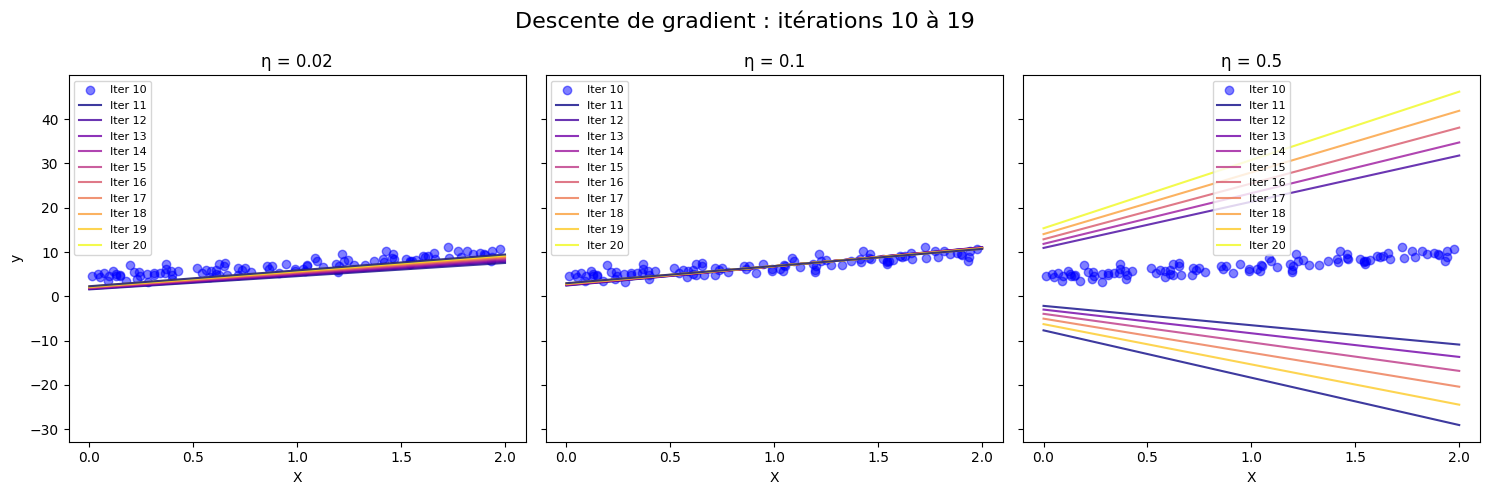

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Génération du jeu de données
np.random.seed(42)
m = 100  # Nombre d'observations
X = 2 * np.random.rand(m, 1)  # Features
y = 4 + 3 * X + np.random.randn(m, 1)  # Target _ Relation linéaire avec bruit

# Ajout de la colonne de biais (X_b contient X et une colonne de 1)
X_b = np.c_[np.ones((m, 1)), X]

# Descente de gradient
def gradient_descent(X_b, y, eta, n_iterations=10):
    theta = np.random.randn(2, 1)  # Initialisation aléatoire
    history = [theta.copy()]  # Stocke les valeurs de theta
    
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        history.append(theta.copy())  # Sauvegarde de l'évolution

    return history

# Continue la descente de gradient pour 10 itérations supplémentaires
def continue_gradient_descent(X_b, y, eta, n_iterations=10, initial_theta=None):
    if initial_theta is None:
        initial_theta = np.random.randn(2, 1)  # Initialisation aléatoire si aucune valeur de theta donnée
    
    theta = initial_theta
    history = [theta.copy()]  # Stocke les valeurs de theta
    
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        history.append(theta.copy())  # Sauvegarde de l'évolution

    return history

# Paramètres d'apprentissage
etas = [0.02, 0.1, 0.5]
n_iterations = 10  # Nombre d'itérations supplémentaires

# Création des sous-graphiques pour afficher les 10 itérations suivantes pour chaque eta
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

X_range = np.array([[0], [2]])  # Intervalle pour afficher les lignes de régression

for ax, eta in zip(axes, etas):
    # Phase 1 : Exécution des 10 premières itérations
    history_initial = gradient_descent(X_b, y, eta, n_iterations)

    # Phase 2 : Continuer la descente de gradient après les 10 premières itérations
    history_additional = continue_gradient_descent(X_b, y, eta, n_iterations, initial_theta=history_initial[-1])

    # Affichage du jeu d'entrainement en nuage de points
    ax.scatter(X, y, color='blue', alpha=0.5, label="Données")

    # Palette de couleurs pour les 10 itérations suivantes (du vert au rouge)
    colors = plt.cm.plasma(np.linspace(0, 1, n_iterations))

    # Légendes
    legend_labels = []

    # Tracer les 10 itérations suivantes (de 10 à 19)
    for i, theta in enumerate(history_additional):
        y_pred = theta[0] + theta[1] * X_range
        ax.plot(X_range, y_pred, linestyle='-', color=colors[i % len(colors)], alpha=0.8)

        # Ajouter le numéro d'itération à la légende
        legend_labels.append(f"Iter {i + 10}")  # Ajouter 10 pour ces itérations

    # Ajout du titre et des étiquettes
    ax.set_title(f"η = {eta}")
    ax.set_xlabel("X")
    ax.set_xticks(np.arange(0, 2.1, 0.5))  # graduations de 0 à 2 avec un pas de 0.5
    ax.legend(legend_labels, fontsize=8)  # Ajouter la légende avec les numéros d'itération

axes[0].set_ylabel("y")  # Ajouter le label Y au premier graphe

fig.suptitle("Descente de gradient : itérations 10 à 19", fontsize=16)  # Titre global
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Ajuste la position du titre global

plt.show()
